# 문제풀이

In [4]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)
##  
import warnings;
with warnings.catch_warnings():
    warnings.simplefilter("ignore"); 
    import matplotlib.pyplot as plt

## 방정식에 대해 기억을 환기시키는 메모

[Gotcha](12-gotcha.html)절에서 심파이에서 기호방정식은 `=`, `==`으로 표현되는 것이 아니라, `Eq`로 표현되는 것을 상기한다. 

In [5]:
Eq(x, y)

하지만, 더 쉬운 방식도 있다.
심파이에서 `Eq`에 없는 표현식은 문제풀이 함수가 0과 같다고 자동으로 가정한다.
$a=b$이면 $a-b=0$으로 필요충분조건이기 때문에, `x==y`를 사용하는 대신에, `x-y`만 사용할 수 있다. 예를 들어, 

In [6]:
solveset(Eq(x**2, 1), x)

In [7]:
solveset(Eq(x**2 -1, 0), x)

In [8]:
solveset(x**2 -1, x)

풀려고 하는 방정식이 이미 0과 같은 경우 특히나 도움이 된다.
`solveset(Eq(expr, 0), x)` 타이핑하는 대신에, `solveset(expr,x)`를 바로 사용할 수 있다.

## 방정식을 대수적으로 문제풀기

대수방정식을 푸는 주요 함수가 `solveset`이다.
`solveset` 구문은 `solveset(equation, variable=None, domain=S.Complexes)`이다.
`equations`는 `Eq` 인스턴스이거나 0과 같다고 가정한 표현식 형태일 수 있다.

방정식을 푸는데 사용될 수 있는 `solve`라는 또다른 함수도 주목한다.
구문은 `solve(equations, variables)`이지만, `solveset`을 사용할 것을 추천한다.

방정식 한개를 풀 때, `solveset` 출력결과는 해에 대해 `FiniteSet` 혹은 `Interval` 혹은 `ImageSet`이 된다.

In [9]:
solveset(x**2-x,x)

In [10]:
solveset(x-x, x, domain=S.Reals)

In [13]:
solveset(sin(x)-1, x, domain=S.Reals)

해가 없는 경우, `EmptySet`이 반환되고, 해를 찾을 수 없는 경우 `ConditionSet`이 반환된다.

In [14]:
solveset(exp(x), x)

In [15]:
solveset(cos(x)-x, x)

`solveset` 모듈에서, 선형방정식 시스템을 `linsolve`를 사용해서 풀수 있다.
향후 `solveset`에서 직접 `linsolve`를 사용할 수 있을 것이다.
`linsolve` 구문에 대한 예제가 다음에 나와 있다.

* 리스트 방정식 형태:

In [16]:
linsolve([x+y+z-1, x+y+2*z-3],(x,y,z))

* 덧붙임 행렬 형태

In [17]:
linsolve(Matrix(([1,1,1,1],[1,1,2,3])),(x,y,z))

* $A*x=b$ 형태

In [21]:
M = Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b=M[:,:-1],M[:,-1]
linsolve(system, x, y,z)

> 주목: 해의 순서는 주어진 기호 순서와 대응된다.

`solveset`은 한번만 각해를 출력한다.
중복을 포함하는 다항식에 대한 해를 구하려면, `roots` 함수를 사용한다.

In [22]:
solveset(x**3 -6*x**2 + 9*x, x)

In [23]:
roots(x**3 -6*x**2 + 9*x, x)

`roots`를 돌려나온 `{0: 1, 3: 2}` 출력결과는 `0`이 중복 1회를 갖는 해이고, `3`은 중복 2회를 갖는 해이다.

> ### `solveset`이 풀 수 없는 방정식 유형 {.callout}
>
> * 비선형 다변량 시스템
> * LambertW로 풀 수 있는 방정식(초월 방정식 문제풀이 프로그램)
>
> `solve`를 이런 경우에 사용한다.

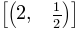

In [24]:
solve([x*y-1,x-2],x,y)

In [25]:
solve(x*exp(x)-1,x)

## 미분 방정식 문제풀이

미분방정식을 푸는데 `dsolve`를 사용한다.
먼저, `cls=Function`을 `symbols` 함수에 인자로 전달해서 부정의 함수(undefined function)를 생성한다.

In [26]:
f,g=symbols('f g', cls=Function)

`f`와 `g`는 이제 부정의 함수가 되었다.
`f(x)`를 호출할 수 있고, 미지함수를 표현하게 된다.

In [27]:
f(x)

`f(x)` 미분은 평가되지 않는다.

In [28]:
f(x).diff(x)

(미분에 대한 좀더 자세한 사항은 [Derivatives](http://docs.sympy.org/latest/tutorial/calculus.html#tutorial-derivatives)를 참조한다.)
$f''(x) - 2f'(x) + f(x) = \sin(x)$ 미분방정식을 표현하는데, 다음과 같이 활용한다.

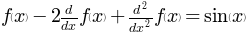

In [29]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

ODE 해를 구하려면, `dsolve` 함수에 풀 함수를 넘긴다.

In [30]:
dsolve(diffeq, f(x))

`dsolve`는 `Eq` 인스턴스를 반환한다. 이유는 일반적으로 미분방정식 해가 해당 함수에 대해 명시적으로 풀 수가 없기 때문이다.

In [31]:
dsolve(f(x).diff(x)*(1 - sin(f(x))), f(x))

`dsolve`에서 나온 해는 임의 상수로 `C1`, `C2`, `C3` 등과 같은 기호형태를 갖는다.